# Post Processing

This notebook is used to post process submissions. It's divided into 5 majors steps :
1. Extract automatically all archives from the input directory.
2. Convert all denses point cloud files (`.las` or `.laz`) into DEMs with `point2dem` command from ASP.
3. Coregister DEMs with references DEMs. And compute difference between coregistered DEMs and references DEMs.
4. Compute some global statistics on all the Post Processing.
5. Generate some plots.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import history
import history.postprocessing.visualization as viz
from pathlib import Path
import pandas as pd

/home/godinlu/micromamba/envs/history/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Settings and Paths Managing

For the post Preprocessing workflow their is a lot of directory and paths. To simplify it, let's used the class `history.postprocessing.PathsManager`. 

In [3]:
BASE_DIR = Path("/mnt/summer/USERS/DEHECQA/history/output") 

CUSTOM_PATHS = {
    "iceland_ref_dem_zoom": "/mnt/summer/USERS/DEHECQA/history/output/processing/aux_data/iceland_ref_dem_zoom_5m.tif",
    "casagrande_ref_dem_zoom": "/mnt/summer/USERS/DEHECQA/history/output/processing/aux_data/casagrande_ref_dem_zoom_5m.tif"
}
paths_manager = history.postprocessing.PathsManager(BASE_DIR, CUSTOM_PATHS)

# other settings
OVERWRITE = False
DRY_RUN = False # set this to True to avoid process
MAX_WORKERS = 4
VERBOSE = True
PDAL_EXEC_PATH = "/home/godinlu/micromamba/envs/pdal/bin/pdal"

postproc = history.postprocessing.PostProcessing(paths_manager)

## Step 1 : extract submissions

In [4]:
postproc.uncompress_all_submissions(OVERWRITE, DRY_RUN, VERBOSE)

Found 27 archive files
/mnt/summer/USERS/DEHECQA/history/output/raw/ASPY_CG.tgz
/mnt/summer/USERS/DEHECQA/history/output/raw/ASPY_IL.tgz
/mnt/summer/USERS/DEHECQA/history/output/raw/ESM_project_HISTORY_submission.zip
/mnt/summer/USERS/DEHECQA/history/output/raw/HIATUS_CG_AI_PP_CY_GY_PN_MN.zip
/mnt/summer/USERS/DEHECQA/history/output/raw/HIATUS_CG_AI_PP_CY_GY_PN_MY.zip
/mnt/summer/USERS/DEHECQA/history/output/raw/HSfM_CG_AI_PP_CY_GN_PY_MN.tgz
/mnt/summer/USERS/DEHECQA/history/output/raw/HSfM_CG_AI_PP_CY_GY_PY_MN.tgz
/mnt/summer/USERS/DEHECQA/history/output/raw/HSfM_IL_AI_PP_CY_GN_PY_MN.tgz
/mnt/summer/USERS/DEHECQA/history/output/raw/HSfM_IL_AI_PP_CY_GY_PN_MN.tgz
/mnt/summer/USERS/DEHECQA/history/output/raw/JB_CG_AI_PP_CY_GN_PN_MN.tar.gz
/mnt/summer/USERS/DEHECQA/history/output/raw/JB_CG_MC_PP_CY_GN_PN_MN.tar.gz
/mnt/summer/USERS/DEHECQA/history/output/raw/JB_IL_AI_PP_CY_GN_PN_MN.tar.gz
/mnt/summer/USERS/DEHECQA/history/output/raw/JB_IL_MC_PP_CY_GN_PN_MN.tar.gz
/mnt/summer/USERS/DEHECQA

{'ASPY_CG.tgz': '/mnt/summer/USERS/DEHECQA/history/output/extracted/ASPY_CG',
 'ASPY_IL.tgz': '/mnt/summer/USERS/DEHECQA/history/output/extracted/ASPY_IL',
 'ESM_project_HISTORY_submission.zip': '/mnt/summer/USERS/DEHECQA/history/output/extracted/ESM_project_HISTORY_submission',
 'HIATUS_CG_AI_PP_CY_GY_PN_MN.zip': '/mnt/summer/USERS/DEHECQA/history/output/extracted/HIATUS_CG_AI_PP_CY_GY_PN_MN',
 'HIATUS_CG_AI_PP_CY_GY_PN_MY.zip': '/mnt/summer/USERS/DEHECQA/history/output/extracted/HIATUS_CG_AI_PP_CY_GY_PN_MY',
 'HSfM_CG_AI_PP_CY_GN_PY_MN.tgz': '/mnt/summer/USERS/DEHECQA/history/output/extracted/HSfM_CG_AI_PP_CY_GN_PY_MN',
 'HSfM_CG_AI_PP_CY_GY_PY_MN.tgz': '/mnt/summer/USERS/DEHECQA/history/output/extracted/HSfM_CG_AI_PP_CY_GY_PY_MN',
 'HSfM_IL_AI_PP_CY_GN_PY_MN.tgz': '/mnt/summer/USERS/DEHECQA/history/output/extracted/HSfM_IL_AI_PP_CY_GN_PY_MN',
 'HSfM_IL_AI_PP_CY_GY_PN_MN.tgz': '/mnt/summer/USERS/DEHECQA/history/output/extracted/HSfM_IL_AI_PP_CY_GY_PN_MN',
 'JB_CG_AI_PP_CY_GN_PN_MN.ta

## Visualize Post Processing files

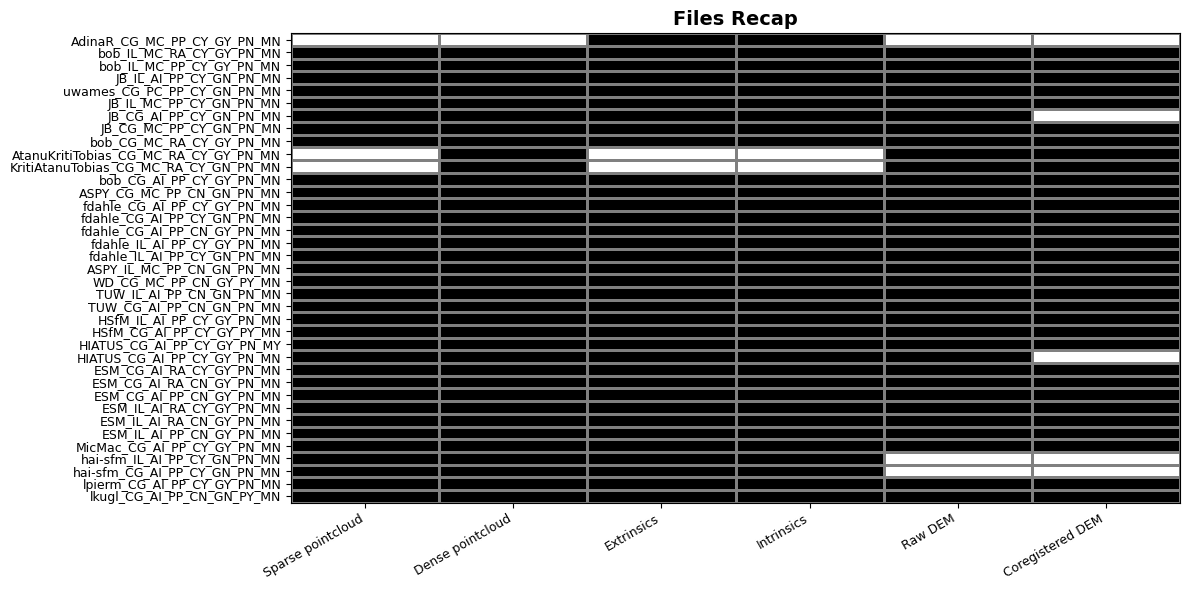

In [5]:
postproc.plot_files_recap()

## Step 2: Convert Dense Point Cloud Files into DEMs

This step processes **dense point cloud files** to generate DEMs that are spatially aligned with their corresponding reference DEMs.

- **Input search**: Point cloud files are searched **recursively** in the directory `extracted_submissions_dir` using the pattern `*_dense_pointcloud.{las,laz}`.  
- **Output location**: The resulting DEMs are saved in the directory `raw_dems_dir`.  
- **Reference selection**: For each point cloud file, the appropriate reference DEM is selected based on its `site` and `dataset` metadata.  

**Note:**  
The method `iter_point2dem` launches the ASP `point2dem` command with the parameters:  
- `max_concurrent_commands`: Maximum number of parallel `point2dem` processes.  
- `max_threads_per_command`: Maximum number of threads allocated to each individual process.  


In [6]:
postproc.iter_convert_pointcloud_to_dem(OVERWRITE, PDAL_EXEC_PATH, MAX_WORKERS, DRY_RUN)

--------------------------------------------------------------------------------
pdal 2.9.2 (git-version: 268d77)
--------------------------------------------------------------------------------

36 dense point cloud file(s) found.
Skipping 34 existing Poind2Dem result(s) (overwrite disabled).
⚠️ Point cloud has no CRS defined. Testing possible options...
⚠️ Point cloud has no CRS defined. Testing possible options...
⚠️ EPSG:4326 does not fit DEM bounds — assuming same CRS as DEM: EPSG:32627
Start processing hai-sfm_IL_AI_PP_CY_GN_PN_MN_dense_pointcloud.las.
⚠️ EPSG:4326 does not fit DEM bounds — assuming same CRS as DEM: EPSG:32612
Start processing hai-sfm_CG_AI_PP_CY_GN_PN_MN_v2_dense_pointcloud.las.


PDAL: Unable to write GDAL data with no points for output.



[!] Error: Command '['/home/godinlu/micromamba/envs/pdal/bin/pdal', 'pipeline', PosixPath('/mnt/summer/USERS/DEHECQA/history/output/processing/raw_dems/processing_pipelines/pdal_pipeline_hai-sfm_IL_AI_PP_CY_GN_PN_MN-DEM.json')]' returned non-zero exit status 1.
[!] Error: Command '['/home/godinlu/micromamba/envs/pdal/bin/pdal', 'pipeline', PosixPath('/mnt/summer/USERS/DEHECQA/history/output/processing/raw_dems/processing_pipelines/pdal_pipeline_hai-sfm_CG_AI_PP_CY_GN_PN_MN-DEM.json')]' returned non-zero exit status 1.


PDAL: Unable to write GDAL data with no points for output.



In [ ]:
import laspy
from shapely.geometry import box
from shapely.ops import transform
import geoutils as gu
import numpy as np

from pyproj import Transformer

pointcloud_path = "/mnt/summer/USERS/DEHECQA/history/output/extracted/MicMac_CG_New/Team_MicMac_New/MicMac_CG_AI_PP_CY_GY_PN_MN_dense_pointcloud.las" 
good_pointcloud_path = "/mnt/summer/USERS/DEHECQA/history/output/extracted/HSfM_CG_AI_PP_CY_GY_PY_MN/HSfM_CG_AI_PP_CY_GY_PY_MN/HSfM_CG_AI_PP_CY_GY_PY_MN_dense_pointcloud.laz" 
ref_dem_path = "/mnt/summer/USERS/DEHECQA/history/output/processing/aux_data/casagrande_ref_dem_zoom_5m.tif"

with laspy.open(pointcloud_path) as las_reader:
    pc_crs = las_reader.header.parse_crs()

ref_dem = gu.Raster(ref_dem_path)
ref_crs = ref_dem.crs
ref_box = box(*ref_dem.bounds)

if pc_crs is None:
    # open the real bounding box of the pointcloud file
    las = laspy.read(pointcloud_path)
    pc_box = box(float(las.x.min()), float(las.y.min()), float(las.x.max()), float(las.y.max()))

    # buffered of 10% of area the ref_dem bounding box
    ref_box_buffered = ref_box.buffer(np.sqrt(ref_box.area) * 0.1)

    for tested_crs in [ref_crs, "EPSG:4326"]:
        transformer = Transformer.from_crs(tested_crs, ref_crs, always_xy=True)
        pc_box_reprojected = transform(transformer.transform, pc_box)

        if pc_box_reprojected.within(ref_box_buffered):
            pc_crs = tested_crs

In [43]:
pc_crs

In [34]:
import numpy as np

np.sqrt(ref_bounding_box.area)

np.float64(33312.159941979146)

In [37]:
ref_bb_buffered = ref_bounding_box.buffer(np.sqrt(ref_bounding_box.area) * 0.1)
tf_bounding_box.within(ref_bb_buffered)

True

## Step 3: Coregister DEMs

Coregister multiple DEMs in a directory to appropriate reference DEMs and return summary statistics.

This function iterates over all DEM files in `input_directory` ending with '-DEM.tif', 
selects the appropriate reference DEM and mask based on the site and dataset information,
and applies coregistration using the `coregister_dem` function. 

Coregistered DEMs are saved to `output_directory`. If `overwrite` is False, existing output files are skipped.
If `dry_run` is True, no coregistration is performed, only file names and planned operations are printed.

In [33]:
postproc.iter_coregister_dems(OVERWRITE, DRY_RUN, VERBOSE)

34 raw DEM file(s) found.
coregister_dem(/mnt/summer/USERS/DEHECQA/history/output/processing/raw_dems/lkugl_CG_AI_PP_CN_GN_PY_MN-DEM.tif, /mnt/summer/USERS/DEHECQA/history/output/processing/aux_data/casagrande_ref_dem_zoom_5m.tif, /mnt/summer/USERS/DEHECQA/history/output/processing/aux_data/casagrande_ref_dem_zoom_5m_mask.tif, /mnt/summer/USERS/DEHECQA/history/output/processing/coreg_dems/lkugl_CG_AI_PP_CN_GN_PY_MN-DEM_coreg.tif)
coregister_dem(/mnt/summer/USERS/DEHECQA/history/output/processing/raw_dems/lpierm_CG_AI_PP_CY_GY_PN_MN-DEM.tif, /mnt/summer/USERS/DEHECQA/history/output/processing/aux_data/casagrande_ref_dem_zoom_5m.tif, /mnt/summer/USERS/DEHECQA/history/output/processing/aux_data/casagrande_ref_dem_zoom_5m_mask.tif, /mnt/summer/USERS/DEHECQA/history/output/processing/coreg_dems/lpierm_CG_AI_PP_CY_GY_PN_MN-DEM_coreg.tif)
coregister_dem(/mnt/summer/USERS/DEHECQA/history/output/processing/raw_dems/MicMac_CG_AI_PP_CY_GY_PN_MN-DEM.tif, /mnt/summer/USERS/DEHECQA/history/output/pr

/home/godinlu/micromamba/envs/history/lib/python3.11/site-packages/xdem/coreg/affine.py:507: RuntimeWarning: All-NaN slice encountered
  vshift = np.nanmedian(dh_step)


Skip HIATUS_CG_AI_PP_CY_GY_PN_MN : The subsample contains no more valid values. This can happen is the horizontal shift to correct is very large, or if the algorithm diverged. To ensure all possible points can be used at any iteration step, use subsample=1.
coregister_dem(/mnt/summer/USERS/DEHECQA/history/output/processing/raw_dems/HIATUS_CG_AI_PP_CY_GY_PN_MY-DEM.tif, /mnt/summer/USERS/DEHECQA/history/output/processing/aux_data/casagrande_ref_dem_zoom_5m.tif, /mnt/summer/USERS/DEHECQA/history/output/processing/aux_data/casagrande_ref_dem_zoom_5m_mask.tif, /mnt/summer/USERS/DEHECQA/history/output/processing/coreg_dems/HIATUS_CG_AI_PP_CY_GY_PN_MY-DEM_coreg.tif)
coregister_dem(/mnt/summer/USERS/DEHECQA/history/output/processing/raw_dems/HSfM_CG_AI_PP_CY_GY_PY_MN-DEM.tif, /mnt/summer/USERS/DEHECQA/history/output/processing/aux_data/casagrande_ref_dem_zoom_5m.tif, /mnt/summer/USERS/DEHECQA/history/output/processing/aux_data/casagrande_ref_dem_zoom_5m_mask.tif, /mnt/summer/USERS/DEHECQA/hist

/home/godinlu/micromamba/envs/history/lib/python3.11/site-packages/xdem/coreg/affine.py:507: RuntimeWarning: All-NaN slice encountered
  vshift = np.nanmedian(dh_step)


Skip JB_CG_AI_PP_CY_GN_PN_MN : The subsample contains no more valid values. This can happen is the horizontal shift to correct is very large, or if the algorithm diverged. To ensure all possible points can be used at any iteration step, use subsample=1.
coregister_dem(/mnt/summer/USERS/DEHECQA/history/output/processing/raw_dems/JB_IL_MC_PP_CY_GN_PN_MN-DEM.tif, /mnt/summer/USERS/DEHECQA/history/output/processing/aux_data/iceland_ref_dem_large.tif, /mnt/summer/USERS/DEHECQA/history/output/processing/aux_data/iceland_ref_dem_large_mask.tif, /mnt/summer/USERS/DEHECQA/history/output/processing/coreg_dems/JB_IL_MC_PP_CY_GN_PN_MN-DEM_coreg.tif)
coregister_dem(/mnt/summer/USERS/DEHECQA/history/output/processing/raw_dems/uwames_CG_PC_PP_CY_GN_PN_MN-DEM.tif, /mnt/summer/USERS/DEHECQA/history/output/processing/aux_data/casagrande_ref_dem_large.tif, /mnt/summer/USERS/DEHECQA/history/output/processing/aux_data/casagrande_ref_dem_large_mask.tif, /mnt/summer/USERS/DEHECQA/history/output/processing/co

## Step 4: Compute statistics

In [34]:
# compute all statistics
global_statistics = history.postprocessing.statistics.compute_global_statistics(paths_manager)

# save statistics in a csv file
global_statistics.to_csv(paths_manager.get_path("processing_dir") / "postprocessing_statistics.csv")

Computing statistics: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 37/37 [08:22<00:00, 13.57s/it]


In [36]:
landcover_statistics = history.postprocessing.statistics.compute_landcover_statistics(paths_manager)


landcover_statistics.to_csv(paths_manager.get_path("processing_dir") / "landcover_statistics.csv")

landcover computing:  66%|█████████████████████████████████████████████████████████████████████▌                                    | 21/32 [05:56<04:17, 23.39s/it]/home/godinlu/micromamba/envs/history/lib/python3.11/site-packages/geoutils/raster/geotransformations.py:99: UserWarning: Output projection, bounds and grid size are identical -> returning self (not a copy!)
  warnings.warn("Output projection, bounds and grid size are identical -> returning self (not a copy!)")
landcover computing:  69%|████████████████████████████████████████████████████████████████████████▉                                 | 22/32 [06:05<03:10, 19.07s/it]/home/godinlu/micromamba/envs/history/lib/python3.11/site-packages/geoutils/raster/geotransformations.py:99: UserWarning: Output projection, bounds and grid size are identical -> returning self (not a copy!)
  warnings.warn("Output projection, bounds and grid size are identical -> returning self (not a copy!)")
landcover computing:  72%|████████████████████

## Step 5 : Generate plots



In [38]:
global_statistics_path = paths_manager.get_path("processing_dir") / "postprocessing_statistics.csv"
landcover_statistics_path = paths_manager.get_path("processing_dir") / "landcover_statistics.csv"

plot_dirs = {"all": paths_manager.get_path("processing_dir") / "plots", "inliers": paths_manager.get_path("processing_dir") / "plots_inliers"}

stat = pd.read_csv(global_statistics_path, index_col="code")
stat_inliers = stat.loc[stat["inliers"]]

lc_stat = pd.read_csv(landcover_statistics_path)
lc_stat_inliers = lc_stat.loc[lc_stat["code"].isin(stat_inliers.index)]

stat_dict = {"all": stat, "inliers": stat_inliers}
lc_stat_dict = {"all": lc_stat, "inliers": lc_stat_inliers}


# print some informations about the global df
for key, df in stat_dict.items():
    print(f"\nSummary with {key} submissions : \n")
    participant_number = len(df["author"].unique())
    submission_number = len(df)

    print(f"Number of participants : {participant_number}")
    print(f"Number of submissions : {submission_number}")

    print("submission by site/dataset :\n")
    print(pd.crosstab(df["dataset"], df["site"]))


Summary with all submissions : 

Number of participants : 17
Number of submissions : 37
submission by site/dataset :

site     casa_grande  iceland
dataset                      
aerial            16        9
kh9mc              7        4
kh9pc              1        0

Summary with inliers submissions : 

Number of participants : 13
Number of submissions : 27
submission by site/dataset :

site     casa_grande  iceland
dataset                      
aerial             9        7
kh9mc              6        4
kh9pc              1        0


generate all statistics plots

In [39]:
for key, df in stat_dict.items():

    stat_dir = plot_dirs[key] / "statistics"
    viz.generate_nmad_groupby(df, stat_dir / "nmad")
    viz.barplot_var(df, stat_dir, "dense_pointcloud_point_count", "Point count")
    viz.barplot_var(df, stat_dir, "ddem_before_nmad", "NMAD before coregistration")
    viz.plot_coregistration_shifts(df, stat_dir / "coreg_shifts")

    # landcover plots
    viz.generate_landcover_boxplot_by_dataset_site(lc_stat_dict[key], stat_dir / "landcover_stats")
    viz.generate_landcover_nmad_by_dataset_site(lc_stat_dict[key], stat_dir / "landcover_stats")
    viz.generate_landcover_grouped_boxplot_by_dataset_site(lc_stat_dict[key], stat_dir / "landcover_stats")

generate individual coregistration plots

In [40]:
for key, df in stat_dict.items():
    viz.generate_coregistration_individual_plots(df, plot_dirs[key] / "coregistration_individual_plots")

Generating coregistration plots:   9%|████████▉                                                                                      | 3/32 [00:09<01:34,  3.27s/it]/home/godinlu/micromamba/envs/history/lib/python3.11/site-packages/matplotlib/colors.py:778: RuntimeWarning: overflow encountered in multiply
  xa *= self.N
Generating coregistration plots: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:47<00:00,  1.77s/it]


generate std dems

In [41]:
for key, df in stat_dict.items():
    std_dems_dir = plot_dirs[key] / "std-DEMs"

    # computing std mnt and landcover stats on thoses 
    history.postprocessing.statistics.generate_std_dems_by_site_dataset(df, std_dems_dir)
    lc_df = history.postprocessing.statistics.compute_landcover_statistics_from_std_dems(paths_manager, std_dems_dir)
    lc_df.to_csv(std_dems_dir / "landcover_statistics.csv", index=False)

    # generate plots
    viz.generate_std_dem_plots(std_dems_dir)
    viz.generate_landcover_grouped_boxplot_from_std_dems(lc_df, std_dems_dir / "grouped-boxplot-landcover-std.png")

/home/godinlu/micromamba/envs/history/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/godinlu/github/history/src/history/postprocessing/statistics.py:509: UserWarning: Skipping STD DEM computation for 'kh9pc-casa_grande': only 1 DEM file(s) available.
  warnings.warn(
/home/godinlu/micromamba/envs/history/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/godinlu/micromamba/envs/history/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/godinlu/github/history/src/history/postprocessing/statistics.py:509: UserWarning: Skipping STD DEM computation for 'kh9pc-casa_grande': only 1 DEM file(s) available.
  w

generate all mosaic plots (can take a while)

In [ ]:
max_cols = {
        "all":{
        ("aerial", "casa_grande"): 5,
        ("aerial", "iceland"): 4,
        ("kh9mc", "casa_gande"): 4,
        ("kh9mc", "iceland"): 4,
        ("kh9pc", "casa_grande"): 4,
        ("kh9pc", "iceland"): 4,
    },
    "inliers":{
        ("aerial", "casa_grande"): 5,
        ("aerial", "iceland"): 4,
        ("kh9mc", "casa_gande"): 4,
        ("kh9mc", "iceland"): 4,
        ("kh9pc", "casa_grande"): 4,
        ("kh9pc", "iceland"): 4,
    }

}
for key, df in stat_dict.items():
    viz.generate_dems_mosaic(df, plot_dirs[key] / "mosaic-DEMs", max_cols[key])
    viz.generate_ddems_mosaic(df, plot_dirs[key] / "mosaic-DDEMs", max_cols[key])
    viz.generate_hillshades_mosaic(df, plot_dirs[key] / "mosaic-hillshades", max_cols[key])
    viz.generate_slopes_mosaic(df, plot_dirs[key] / "mosaic-slopes", max_cols[key])